# Initial Setup

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'Racesv2.0/train'
valid_path = 'Racesv2.0/valid'
test_path = 'Racesv2.0/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['AfricanAmerican', 'Caucasian'], batch_size=50)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['AfricanAmerican', 'Caucasian'],batch_size=25)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['AfricanAmerican', 'Caucasian'],batch_size=20)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(40,24), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

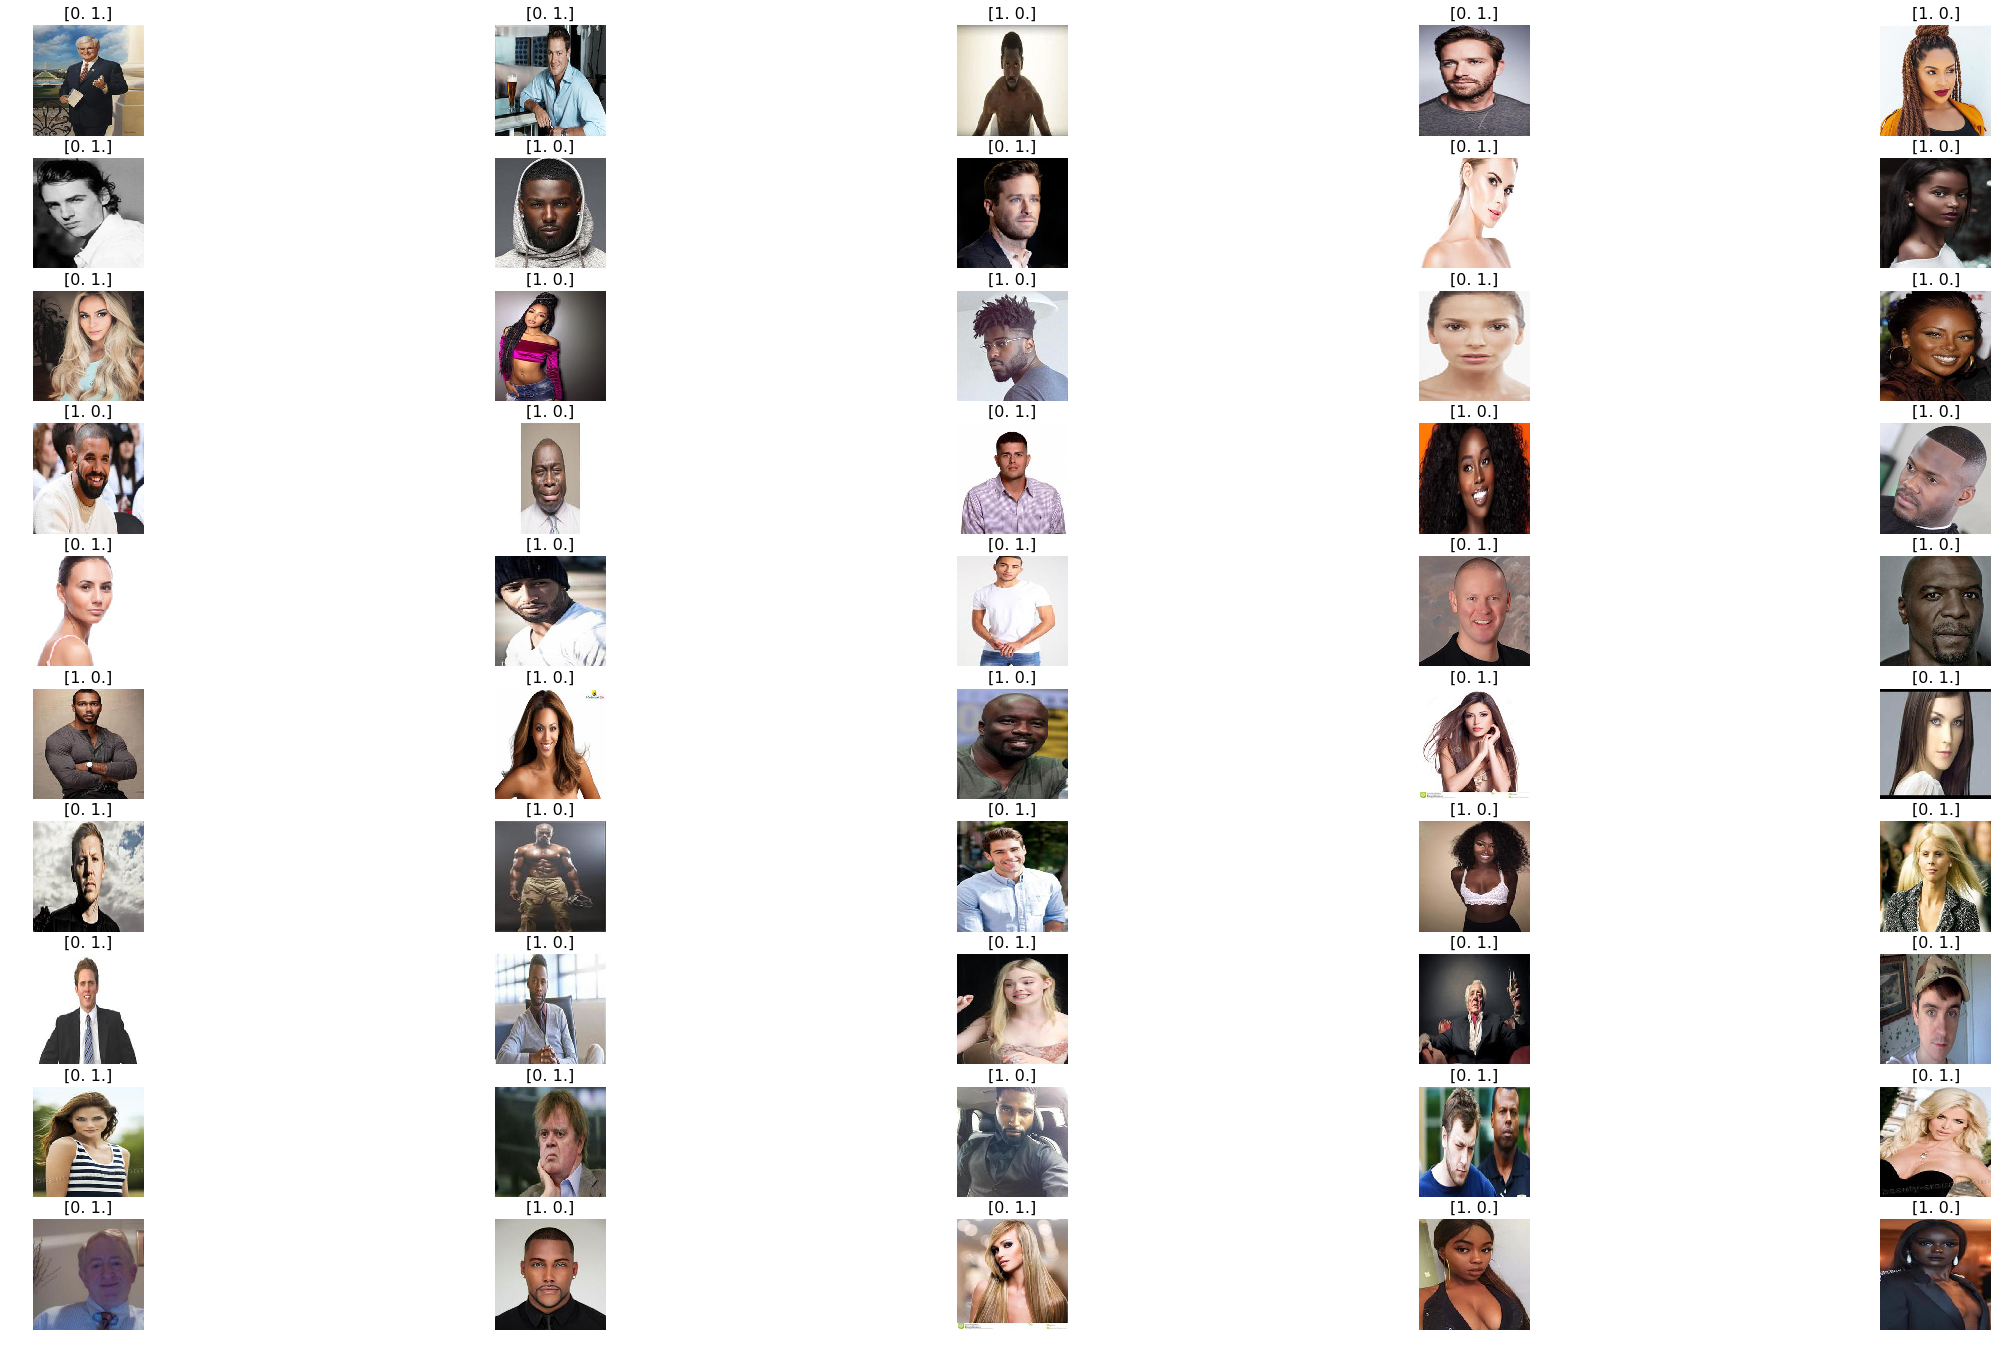

In [6]:
plots(imgs, titles=labels)

# Sequential Model Build and Training

In [7]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax'),
    ])

In [8]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 4s - loss: 7.8412 - acc: 0.5000 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 2/5
 - 4s - loss: 7.9785 - acc: 0.5050 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 3/5
 - 4s - loss: 7.9785 - acc: 0.5050 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 4/5
 - 4s - loss: 7.9785 - acc: 0.5050 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 5/5
 - 4s - loss: 7.9785 - acc: 0.5050 - val_loss: 7.8979 - val_acc: 0.5100


# Sequential Model Predictions

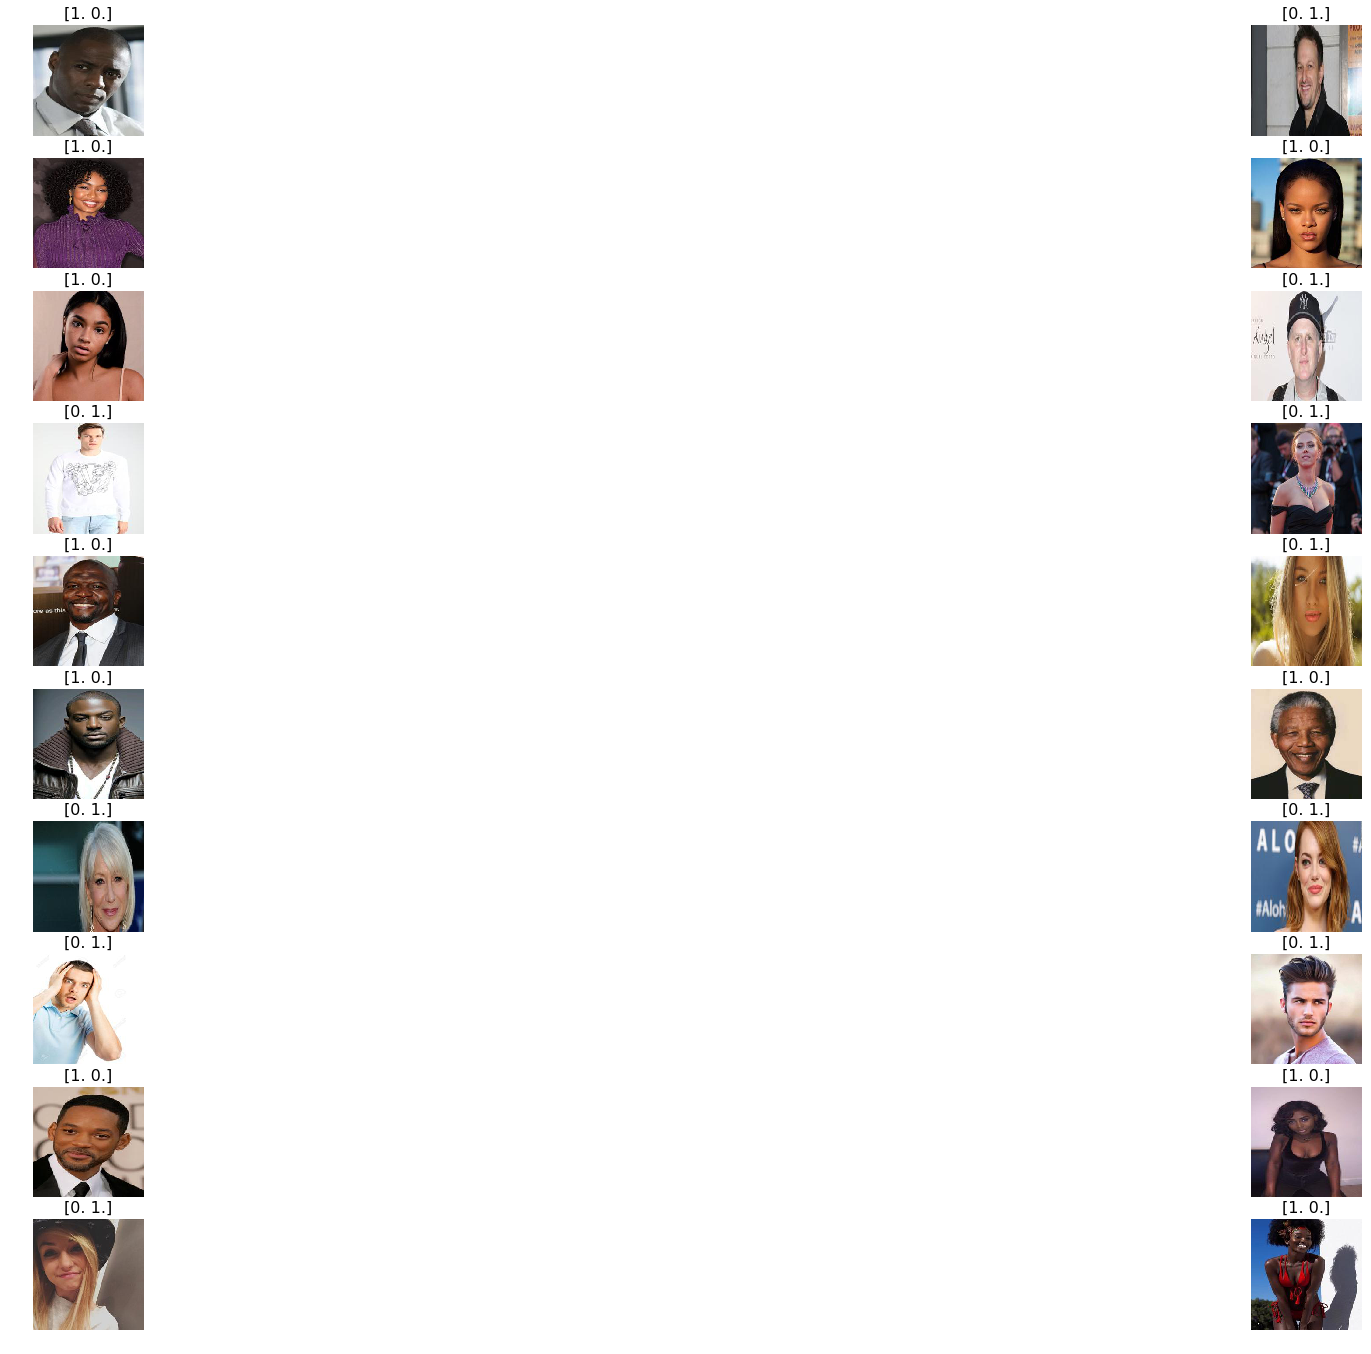

In [10]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [11]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [13]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Sequential Model Results

In [14]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,  cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Confusion matrix, without normalization
[[10  0]
 [10  0]]


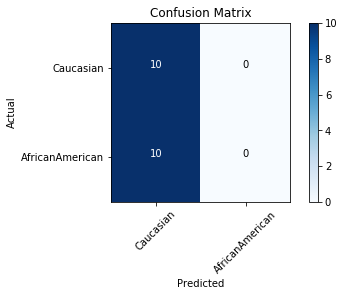

In [16]:
cm_plot_labels = ['Caucasian', 'AfricanAmerican']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# VGG16 Model Build and Fine-tuning

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

In [20]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
model.layers.pop()

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
for layer in model.layers:
    layer.trainable = False

In [25]:
model.add(Dense(2, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# VGG16 Model Training

In [27]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=15, verbose=2)

Epoch 1/15
 - 45s - loss: 0.6914 - acc: 0.5300 - val_loss: 0.6929 - val_acc: 0.5300
Epoch 2/15
 - 44s - loss: 0.6866 - acc: 0.6600 - val_loss: 0.6916 - val_acc: 0.5800
Epoch 3/15
 - 44s - loss: 0.6825 - acc: 0.7500 - val_loss: 0.6902 - val_acc: 0.5500
Epoch 4/15
 - 44s - loss: 0.6788 - acc: 0.8050 - val_loss: 0.6887 - val_acc: 0.5900
Epoch 5/15
 - 44s - loss: 0.6750 - acc: 0.8650 - val_loss: 0.6874 - val_acc: 0.6100
Epoch 6/15
 - 44s - loss: 0.6716 - acc: 0.9050 - val_loss: 0.6861 - val_acc: 0.6400
Epoch 7/15
 - 44s - loss: 0.6684 - acc: 0.9100 - val_loss: 0.6851 - val_acc: 0.6500
Epoch 8/15
 - 44s - loss: 0.6654 - acc: 0.9150 - val_loss: 0.6839 - val_acc: 0.6600
Epoch 9/15
 - 44s - loss: 0.6624 - acc: 0.9150 - val_loss: 0.6826 - val_acc: 0.6700
Epoch 10/15
 - 44s - loss: 0.6597 - acc: 0.9300 - val_loss: 0.6813 - val_acc: 0.6900
Epoch 11/15
 - 44s - loss: 0.6571 - acc: 0.9300 - val_loss: 0.6798 - val_acc: 0.6800
Epoch 12/15
 - 44s - loss: 0.6544 - acc: 0.9350 - val_loss: 0.6782 - val_a

# VGG16 Model Predictions

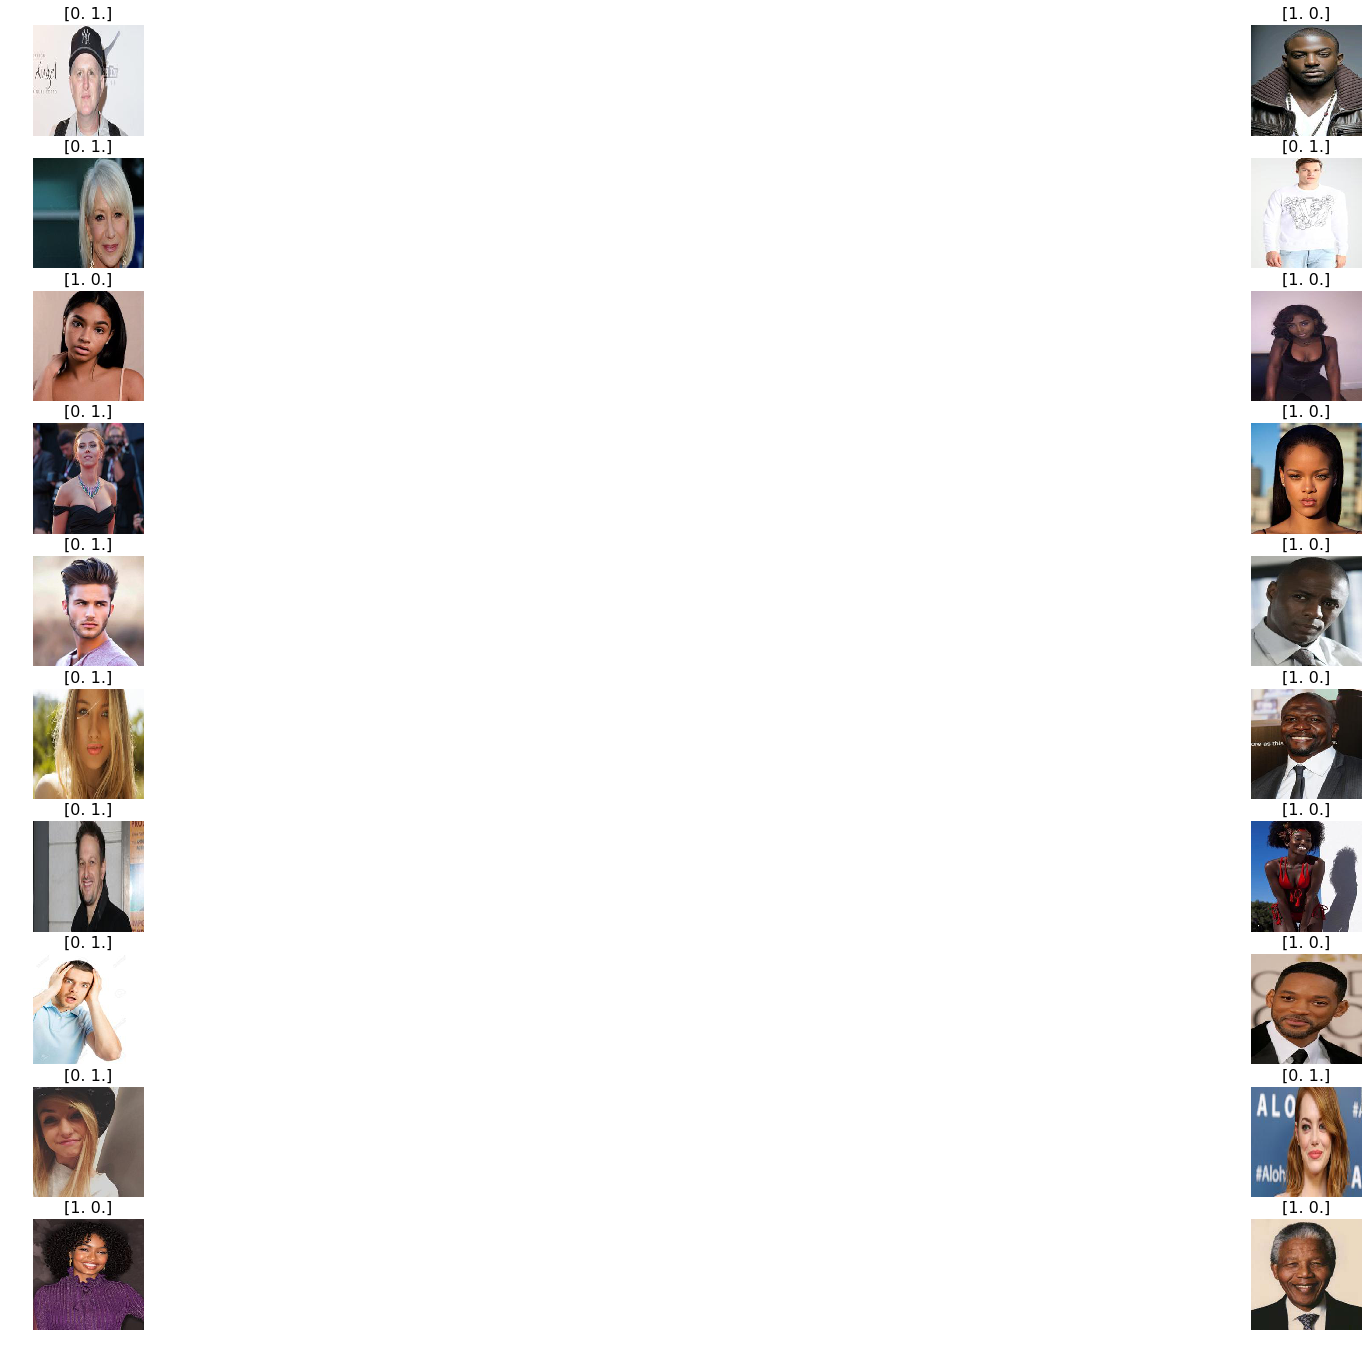

In [29]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [30]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1.], dtype=float32)

In [31]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [34]:
predictions

array([[0.52030265, 0.4796973 ],
       [0.52067226, 0.47932768],
       [0.47389793, 0.52610207],
       [0.49326783, 0.5067322 ],
       [0.49401528, 0.5059847 ],
       [0.5235123 , 0.47648767],
       [0.5220309 , 0.47796914],
       [0.5062527 , 0.4937473 ],
       [0.47961745, 0.5203826 ],
       [0.53255206, 0.46744794],
       [0.5078388 , 0.49216124],
       [0.5340835 , 0.4659165 ],
       [0.49502438, 0.5049757 ],
       [0.5053943 , 0.49460566],
       [0.48237738, 0.51762265],
       [0.5243349 , 0.4756651 ],
       [0.47969058, 0.52030945],
       [0.47193605, 0.52806395],
       [0.53125435, 0.4687457 ],
       [0.49225038, 0.5077496 ]], dtype=float32)

# VGG16 Model Results

In [32]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[7 3]
 [2 8]]


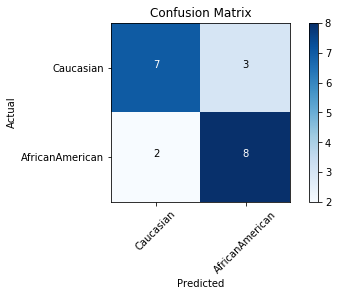

In [33]:
cm_plot_labels = ['Caucasian', 'AfricanAmerican']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')